<a href="https://colab.research.google.com/github/exalteded/DSPS_ejones/blob/master/HW10/Elliott_Jones_copy_of_clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [8]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv")
genes.drop(columns = ["Unnamed: 0"], inplace = True)
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. explore the data. 

In [9]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [10]:
genes.describe

<bound method NDFrame.describe of              1         2         3  ...        85        86        87
0    -0.146342 -0.520637  0.175828  ...  0.550118  0.118934  0.327248
1    -0.465767  0.155823  0.226344  ...  0.463746 -0.514230  0.200956
2    -0.088964 -0.208241 -0.151039  ... -0.199880 -0.415793 -0.032004
3    -0.327696 -1.714948  0.068710  ... -0.215536  0.345946  0.056442
4    -0.092327 -0.660456  0.075948  ... -0.491920 -0.722120  0.055477
...        ...       ...       ...  ...       ...       ...       ...
4219 -0.314408  0.131512 -0.049018  ...  0.502573 -0.061042 -0.206210
4220 -0.313823 -0.041095 -0.049798  ...  0.465487  0.024584 -0.264364
4221 -0.091283  0.118607 -0.088939  ...  0.284263 -0.008146 -0.047151
4222 -0.552395  0.125635 -0.290230  ...  0.246017 -0.002329  0.100187
4223 -0.907778 -0.052512 -0.216276  ... -0.179660 -0.712337 -0.193261

[4224 rows x 74 columns]>

In [11]:
genes.describe

<bound method NDFrame.describe of              1         2         3  ...        85        86        87
0    -0.146342 -0.520637  0.175828  ...  0.550118  0.118934  0.327248
1    -0.465767  0.155823  0.226344  ...  0.463746 -0.514230  0.200956
2    -0.088964 -0.208241 -0.151039  ... -0.199880 -0.415793 -0.032004
3    -0.327696 -1.714948  0.068710  ... -0.215536  0.345946  0.056442
4    -0.092327 -0.660456  0.075948  ... -0.491920 -0.722120  0.055477
...        ...       ...       ...  ...       ...       ...       ...
4219 -0.314408  0.131512 -0.049018  ...  0.502573 -0.061042 -0.206210
4220 -0.313823 -0.041095 -0.049798  ...  0.465487  0.024584 -0.264364
4221 -0.091283  0.118607 -0.088939  ...  0.284263 -0.008146 -0.047151
4222 -0.552395  0.125635 -0.290230  ...  0.246017 -0.002329  0.100187
4223 -0.907778 -0.052512 -0.216276  ... -0.179660 -0.712337 -0.193261

[4224 rows x 74 columns]>

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [12]:
scaledgenes = skl.preprocessing.scale(genes, with_mean = True, with_std = True, copy = True)
scaledgenes

array([[-0.10390895, -1.44631227,  0.54115292, ...,  1.13208158,
         0.49320283,  0.95276799],
       [-0.73943251,  0.53879462,  0.69516384, ...,  0.95494912,
        -0.6950822 ,  0.5877214 ],
       [ 0.01024745, -0.52957084, -0.45538124, ..., -0.40602471,
        -0.51034181, -0.08564642],
       ...,
       [ 0.00563416,  0.42958277, -0.26605602, ...,  0.58686221,
         0.25470697, -0.12942973],
       [-0.9117855 ,  0.45020596, -0.87974112, ...,  0.50842701,
         0.26562461,  0.29644913],
       [-1.61885048, -0.07257629, -0.65427304, ..., -0.36455808,
        -1.06687976, -0.55175871]])

In [13]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [0]:
from sklearn.manifold import TSNE

In [0]:
twodproj = skl.manifold.TSNE(n_components=2, random_state=0)
twodproj = twodproj.fit_transform(scaledgenes)

In [16]:
twodproj.shape

(4224, 2)

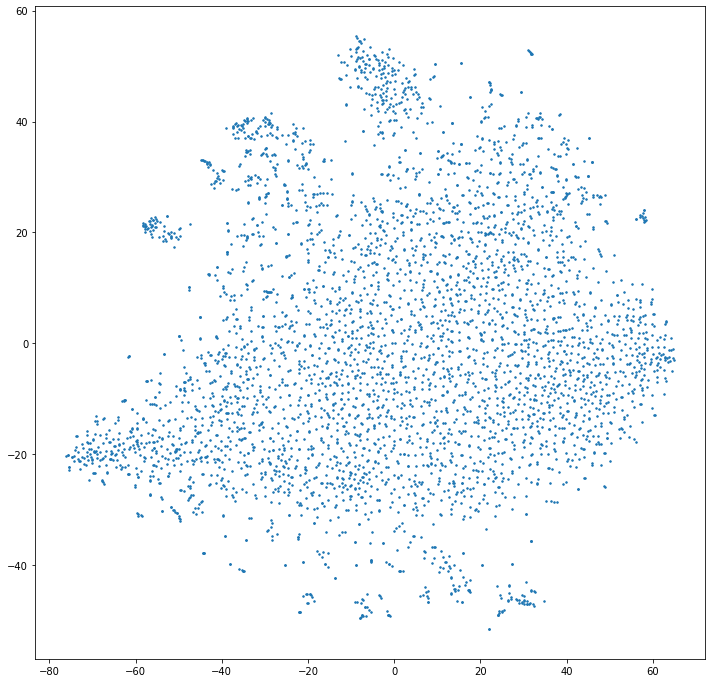

In [17]:
pl.figure(figsize = (12,12))
pl.plot(twodproj[:,0], twodproj[:,1], '.', markersize=3)

2.3 plot the TSNE projection


2.4 calculate a function that measures the intracluster variance (i did it in class)

In [0]:
def calICVar(X, labels):
    icvar = 0
    for n in np.unique(labels):
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2) 
    print(icvar)
    return icvar

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

312576.00000000006
251076.64173410618
231187.35509465548
232407.52233358717
232360.54914377112
226444.6076839027
226718.69343436218
224229.45158162707
221515.33031228342
221772.72457096487


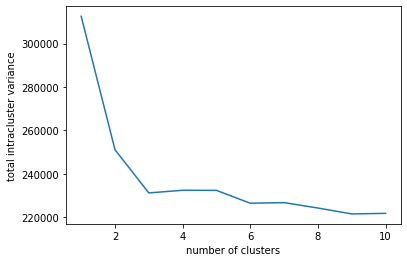

In [19]:
tv = []
for i in range(1, 11):
    km = skl.cluster.k_means(scaledgenes, i)
    tv.append(calICVar(scaledgenes, km[1]))
pl.plot(range(1,11), tv)
pl.xlabel("number of clusters")
pl.ylabel("total intracluster variance");

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

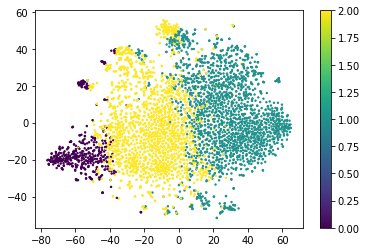

In [59]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_, s = 2)
pl.colorbar();


# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

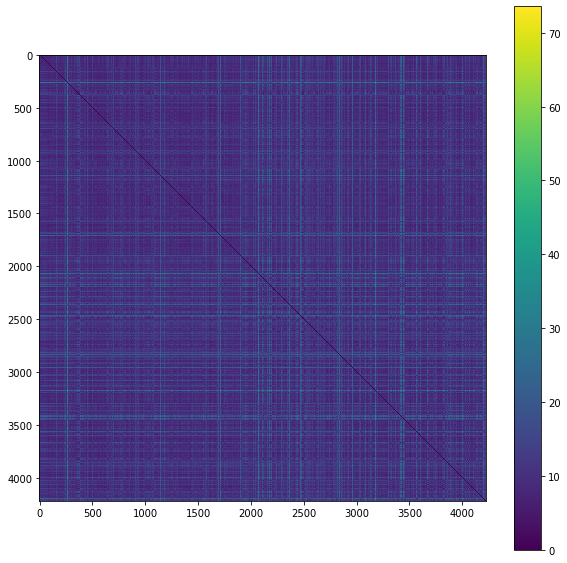

In [24]:
import scipy.spatial
scaledmatrix = scipy.spatial.distance.pdist(scaledgenes)
pl.figure(figsize=(10,10))
pl.imshow(scipy.spatial.distance.squareform(scaledmatrix))

pl.colorbar()


4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

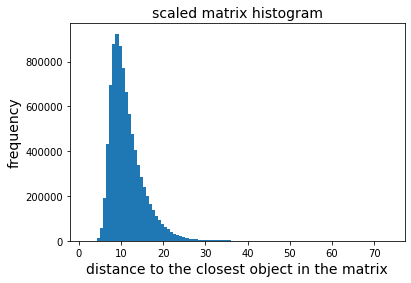

In [93]:
pl.hist(scaledmatrix, bins=100);
pl.title("scaled matrix histogram", FontSize = 14)
pl.ylabel("frequency", FontSize = 14)
pl.xlabel("distance to the closest object in the matrix",FontSize = 14);


4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [29]:
dbs = skl.cluster.DBSCAN(eps =5.6, min_samples=20)
dbs.fit(scaledgenes)

DBSCAN(algorithm='auto', eps=5.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [30]:
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_, len(labels)

(3, 1934, 4224)

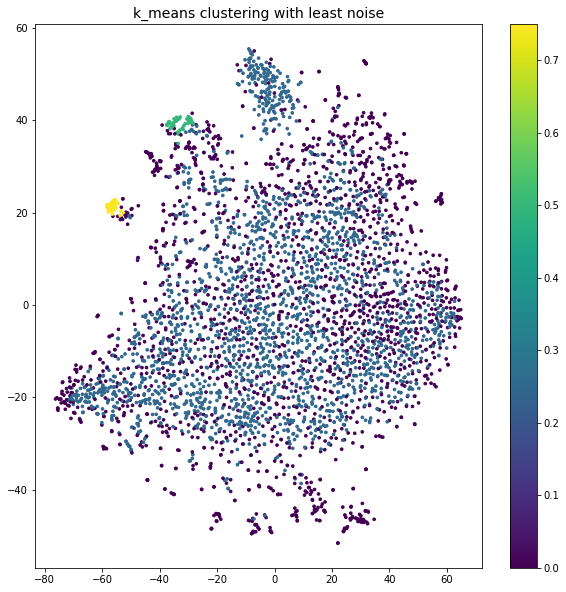

In [94]:
pl.figure(figsize=(10,10))
pl.title("k_means clustering with least noise", FontSize = 14)
pl.scatter(twodproj[:,0], twodproj[:,1],  c=(labels + 1) /4, s = 7)
pl.colorbar()

Here we have 3 clusters which was the most we got while reducing the amount of noise it never really dropped below 2000. this is a significant number of outliers but I think the data itself doesn't really lend to clustering as if we increased the min_samples too high or low it would just cluster the whole data set.

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
links_gene = linkage(scaledgenes, method='ward')

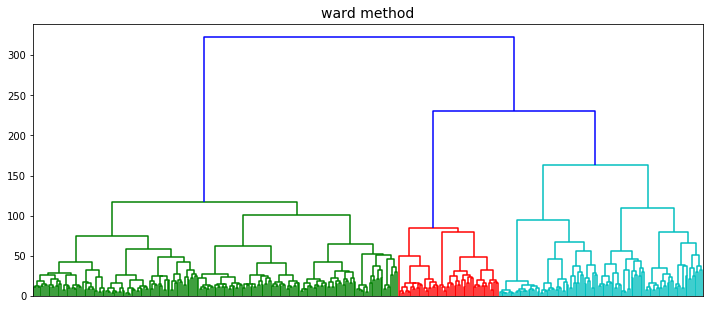

In [95]:
pl.figure(figsize=(12,5))
pl.title('ward method', FontSize = 14)
dendrogram(links_gene, p=8, truncate_mode='level', no_labels=True);

4b.3 repeat with a different linkage and comment on differences

In [0]:
links_gene_2 = linkage(scaledgenes, method='average')

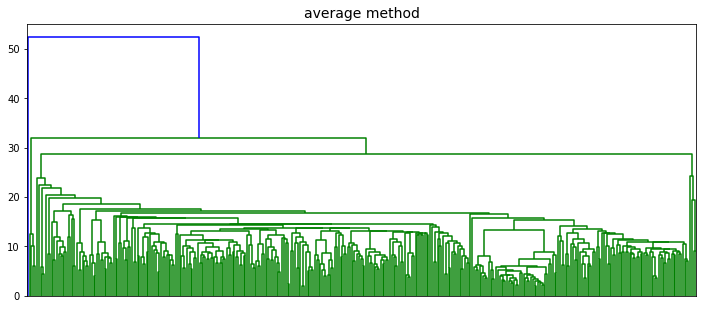

In [96]:
pl.figure(figsize=(12,5))
pl.title("average method", FontSize = 14)
dendrogram(links_gene_2, p=30, truncate_mode='level', no_labels=True);

In the average dendogram there are only two groups most likely because the average distance between genes is relatively the same whereas with the Ward's linkage method, the distance between two clusters is the sum of squared deviations from points to centroids so it deviates more with the squared term.

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

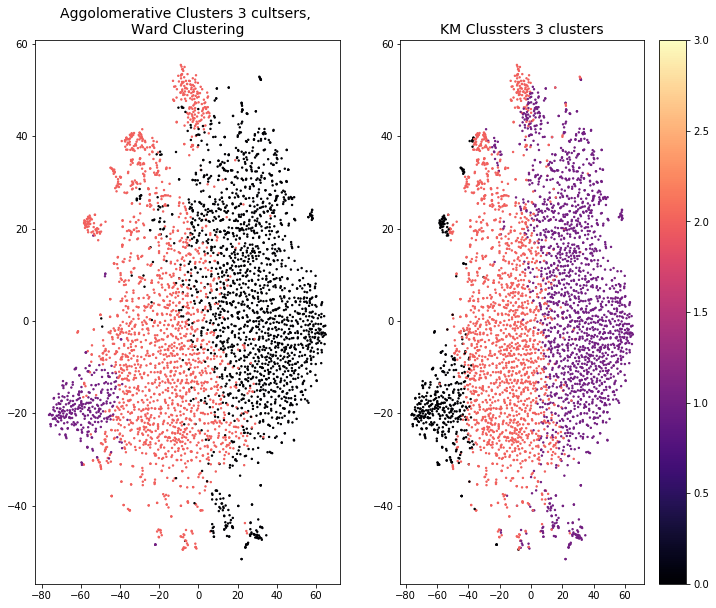

In [98]:
genes_sgcluster = skl.cluster.AgglomerativeClustering(n_clusters=3).fit(scaledgenes)
pl.figure(figsize = (12,10))
pl.subplot(121)
pl.scatter(twodproj[:,0], twodproj[:,1], c=(genes_sgcluster.labels_+2)%3, s = 2, cmap = 'magma', vmax = 3)
pl.title('Aggolomerative Clusters 3 cultsers, \nWard Clustering', FontSize = 14)
pl.subplot(122)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_, s = 2, cmap = 'magma', vmax= 3)
pl.title('KM Clussters 3 clusters', FontSize = 14)
pl.colorbar();

In [43]:
dbs.labels_

array([ 0,  0,  0, ...,  0,  1, -1])